# <center>Delhivery Business Case Study</center>                                                   

## Introduction
Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.
The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

### Problem Statement:
**Delhivery, India's leading logistics provider, aims to leverage its vast data infrastructure to enhance operational efficiency and outperform competitors. The objective is to process data from their engineering pipelines to:**
- **Clean and manipulate raw data** to extract valuable features.
- **Interpret the data** to generate insights that support the development of forecasting models for improving logistics operations.

This analysis is expected to improve the company's quality, efficiency, and profitability through data-driven decision-making.

### 1. Basic data cleaning and exploration <br>
The analysis was conducted on the data located at - https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [2]:
df=pd.read_csv('delhivery_data.csv')

In [3]:
df.head(11)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [4]:
df.shape

(144867, 24)

- **A quick overview of the data indicates it consists of 1,44,867 rows and 24 columns.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [6]:
#To check duplicate values
df.duplicated().sum()

0

In [7]:
#To check missing values
df.isnull().sum()  

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

- The dataset has 293 missing values in the **"source_name" column** and 261 in the **"destination_name" column.** Since these are small compared to the total size of 144,867 rows, it's okay to remove the rows with missing values.
- There are no **duplicate entries.**
- While it's always advisable to consult a domain expert regarding **unknown fields** such as **is_cutoff, cutoff_factor, cutoff_timestamp, factor, and segment_factor** to understand their significance, in this case study, we can proceed to drop them. Since these fields are not required for our current analysis, and no critical insights rely on them, removing them will streamline the data.

In [8]:
#Removing null values
df = df.dropna(how='any')
df = df.drop(columns = ["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"])
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

- **Converting time columns into pandas datetime.**


In [9]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])

In [10]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
std,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700


In [11]:
print(f" Data start date: {min(df['trip_creation_time'])}')  to Data end date: {max(df['trip_creation_time'])}")



 Data start date: 2018-09-12 00:00:16.535741')  to Data end date: 2018-10-03 23:59:42.701692


**Overview of data**
- The data is provided from **2018-09-12 00:00:16.535741 to 2018-10-03 23:59:42.701692**
- The **average distance** between source and destination warehouse is **235 Kms** with **least distance being 9 Kms** and **maximum distance being 1927 Kms**


### 2. **Grouping by segments in the trip**

Aggregating data at both the segment and trip levels is essential for understanding and optimizing the logistics operations in the dataset.

#### **1. Grouping segment-level data**

- **Combine segment information**: Each trip is divided into multiple segments, representing different parts of the journey. Aggregating segment-level data helps in summarizing these individual segments into a coherent view of the trip.
- Creating a unique identifier for different segments of a trip based on the combination of the **trip_uuid, source_center and destination_center** and naming it as **segment_key.**


In [12]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
seg_cols = ['segment_actual_time','segment_osrm_time','segment_osrm_distance' ]
for col in seg_cols:
    df[col+'_sum'] = df.groupby('segment_key')[col].cumsum()

df[[col + '_sum' for col in seg_cols]]

,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,14.0,11.0,11.9653
1,24.0,20.0,21.7243
2,40.0,27.0,32.5395
3,61.0,39.0,45.5619
4,67.0,44.0,49.4772
...,...,...,...
144862,92.0,94.0,65.3487
144863,118.0,115.0,82.7212
144864,138.0,149.0,103.4265
144865,155.0,176.0,122.3150


In [13]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320IND388121AAAIND388620AAB,24.0,20.0,21.7243
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320IND388121AAAIND388620AAB,40.0,27.0,32.5395
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320IND388121AAAIND388620AAB,61.0,39.0,45.5619
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320IND388121AAAIND388620AAB,67.0,44.0,49.4772


#### Aggregating segment-level data

In [14]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()
segment.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


### 3. Feature Engineering

**Extract features from the below fields:**
-  Calculate time taken between od_start_time and od_end_time.

In [15]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() /(3600)
segment['od_time_diff_hour']

0        21.010074
1        16.658423
2         0.980540
3         2.046325
4        13.910649
           ...    
26217     1.035253
26218     1.518130
26219     0.736240
26220     4.791233
26221     1.115559
Name: od_time_diff_hour, Length: 26222, dtype: float64

**Extracting features out of source_name and destination_name variables.**

In [16]:
#Transform all the values in this two columns to lowercase.
segment['source_name'] =  segment['source_name'].str.lower()
segment['destination_name'] = segment['destination_name'].str.lower()


In [17]:
#format = city_place_code (state)

def state(x):                       #Extracting state
    state = x.split('(')[1]
    return state[:-1]

def city(x):                        #Extracting city
    x = x.split(' (')[0]             #removing state
    city = x.split('_')[0]           #splitting city_place_code
    
    #edge cases
    if city in ['mumbai antop hill','lowerparel','bom','mumbai hub']:
        return 'mumbai'
    elif city == 'pnq vadgaon sheri dpc':
        return 'vadgaonsheri'
    elif city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'
    elif city in ['bangalore', 'hbr layout pc', 'blr']: 
        return 'bengaluru'
    elif city == 'bhopal mp nagar' : 
        return 'bhopal'
    elif city == 'amd':
        city = 'ahmedabad'
    elif city == 'ccu':
        city = 'kolkata'
    elif city == 'ggn':
        city == 'gurgaon'
    elif city == 'gzb':
        city = 'ghaziabad'
    
    return city

def place(x):                       #Extracting place
    x = x.split(' (')[0]             #removing state
    a = x.split('_')
    if len(a) >= 3:
        return a[1]
    elif len(a) == 2:               #small cities have same city and place name
        return a[0]        
    return x.split(' ')[0]          #dealing with improper name convention

def code(x):                        #Extracting code
    x = x.split(' (')[0]             #removing state
    if len(x.split('_')) >=3:
        return x.split('_')[-1]
    return 'none'


In [18]:
# Extracting from source_name
segment['source_state'] = segment['source_name'].apply(lambda x: state(x))
segment['source_city'] = segment['source_name'].apply(lambda x: city(x))
segment['source_place'] = segment['source_name'].apply(lambda x: place(x))
segment['source_code'] = segment['source_name'].apply(lambda x: code(x))


In [19]:
segment[['source_state', 'source_city', 'source_place', 'source_code']]

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,madhya pradesh,bhopal,trnsport,h
2,karnataka,doddablpur,chikadpp,d
3,karnataka,tumkur,veersagr,i
4,haryana,gurgaon,bilaspur,hb
...,...,...,...,...
26217,tamil nadu,tirchchndr,shnmgprm,d
26218,tamil nadu,peikulam,srivnktpm,d
26219,tamil nadu,eral,busstand,d
26220,karnataka,sandur,wrdn1dpp,d


In [20]:
# Extracting from destination_name
segment['destination_state'] = segment['destination_name'].apply(lambda x: state(x))
segment['destination_city'] = segment['destination_name'].apply(lambda x: city(x))
segment['destination_place'] = segment['destination_name'].apply(lambda x: place(x))
segment['destination_code'] = segment['destination_name'].apply(lambda x: code(x))

In [21]:
segment[['destination_state','destination_city','destination_place','destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,haryana,gurgaon,bilaspur,hb
1,uttar pradesh,kanpur,central,6
2,karnataka,chikblapur,shntisgr,d
3,karnataka,doddablpur,chikadpp,d
4,punjab,chandigarh,mehmdpur,h
...,...,...,...,...
26217,tamil nadu,thisayanvilai,udnkdird,d
26218,tamil nadu,tirunelveli,vdkkusrt,i
26219,tamil nadu,tirchchndr,shnmgprm,d
26220,karnataka,bellary,bellary,none


**Extracting features from Trip_creation_time variable.**

In [22]:

segment['trip_year'] = segment['trip_creation_time'].dt.year
segment['trip_month'] = segment['trip_creation_time'].dt.month
segment['trip_day'] = segment['trip_creation_time'].dt.day
segment['trip_day_of_week'] = segment['trip_creation_time'].dt.dayofweek

In [23]:
segment[['trip_year', 'trip_month', 'trip_day', 'trip_day_of_week']]

,trip_year,trip_month,trip_day,trip_day_of_week
0,2018,9,12,2
1,2018,9,12,2
2,2018,9,12,2
3,2018,9,12,2
4,2018,9,12,2
...,...,...,...,...
26217,2018,10,3,2
26218,2018,10,3,2
26219,2018,10,3,2
26220,2018,10,3,2


## 4. In-depth analysis

### 4.1 Grouping at trip level

- **Holistic View of the Trip**: After aggregating data at the segment level, aggregating at the trip level combines all segments of a trip into one record. 
- Group segment data by **trip_uuid**, which identifies each unique trip. This allows you to consolidate information from all segments of the trip into a single record.

In [24]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'source_state' : 'first',
    'destination_state' : 'last',
    
    'source_city' : 'first',
    'source_place' : 'first',
    'source_code' : 'first',
    
    'destination_city' : 'last',
    'destination_place' : 'last',
    'destination_code' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [25]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,source_state,...,destination_code,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),uttar pradesh,...,6,2259.0,37.668497,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),karnataka,...,d,180.0,3.026865,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),haryana,...,hb,3933.0,65.572709,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),maharashtra,...,ip,100.0,1.674916,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),karnataka,...,d,717.0,11.972484,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


#### **Why These Steps Are Important:**
- Aggregating segment-level data allows for detailed performance evaluation of individual parts of the trip, while trip-level aggregation provides a complete view of the entire journey.

- By comparing aggregated segment and trip data, you can assess the accuracy of estimated times/distances, identify delays or inefficiencies, and make data-driven decisions to improve logistics.

- Aggregating data helps in simplifying complex datasets with multiple rows for each trip, making it easier to analyze and interpret the overall performance metrics.

Overall, these aggregation steps are crucial for transforming detailed segment-level data into actionable insights at the trip level, facilitating better analysis and decision-making in logistics operations.

### 4.2 Outlier detection & treatment

In [26]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  object        
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   source_state                    14787 non-null  object        
 10  destination_state               14787 non-null  object        
 11  so

- **Identifying outliers in numerical variables and visualizing them with a boxplot.**

In [27]:
num_cols = ['start_scan_to_end_scan', 'od_time_diff_hour', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum']

<AxesSubplot:>

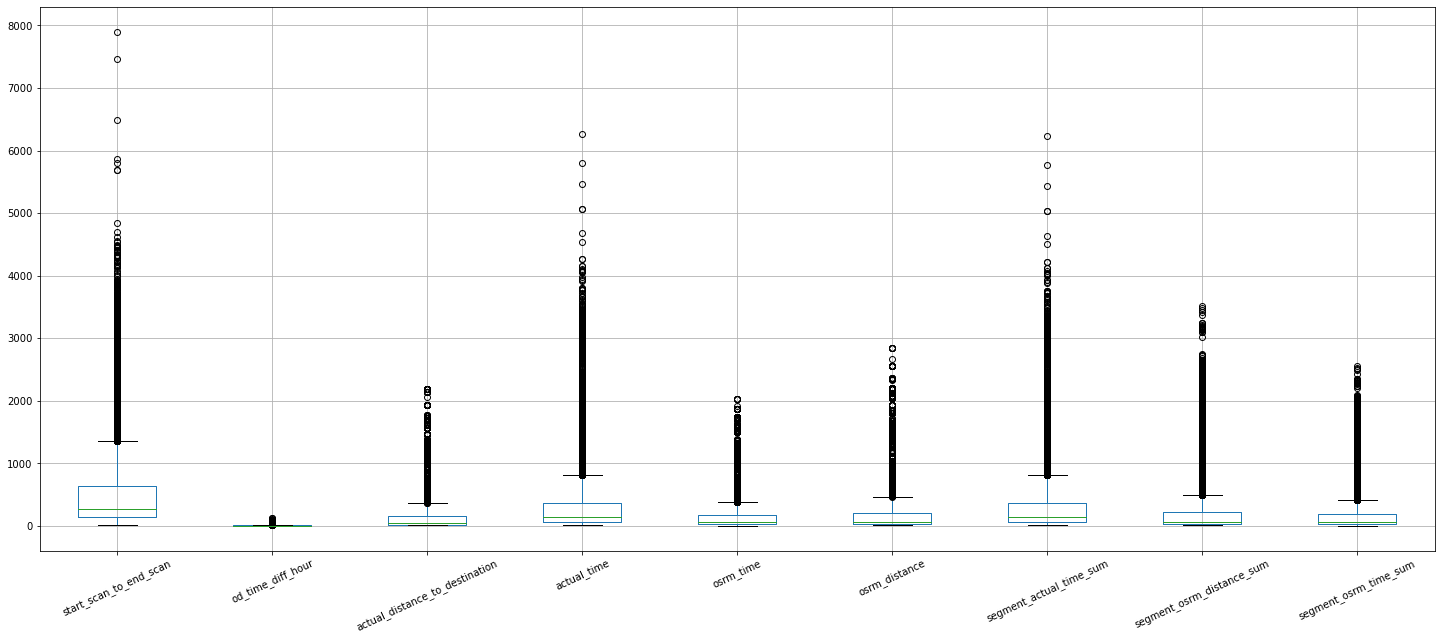

In [28]:
trip[num_cols].boxplot(rot=25,figsize=(25,10))

- **Handling the outliers using IQR method**

In [29]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1
print(f'No of data points before removing outliers: {trip.shape[0]} ')

No of data points before removing outliers: 14787 


In [30]:
outlier_pts = len(trip[((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)])
print(f'Total no of outlier points: {outlier_pts}')

Total no of outlier points: 2064


In [31]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True)
print(f'No of data points after removing outliers: {trip.shape[0]} ')

No of data points after removing outliers: 12723 


<AxesSubplot:>

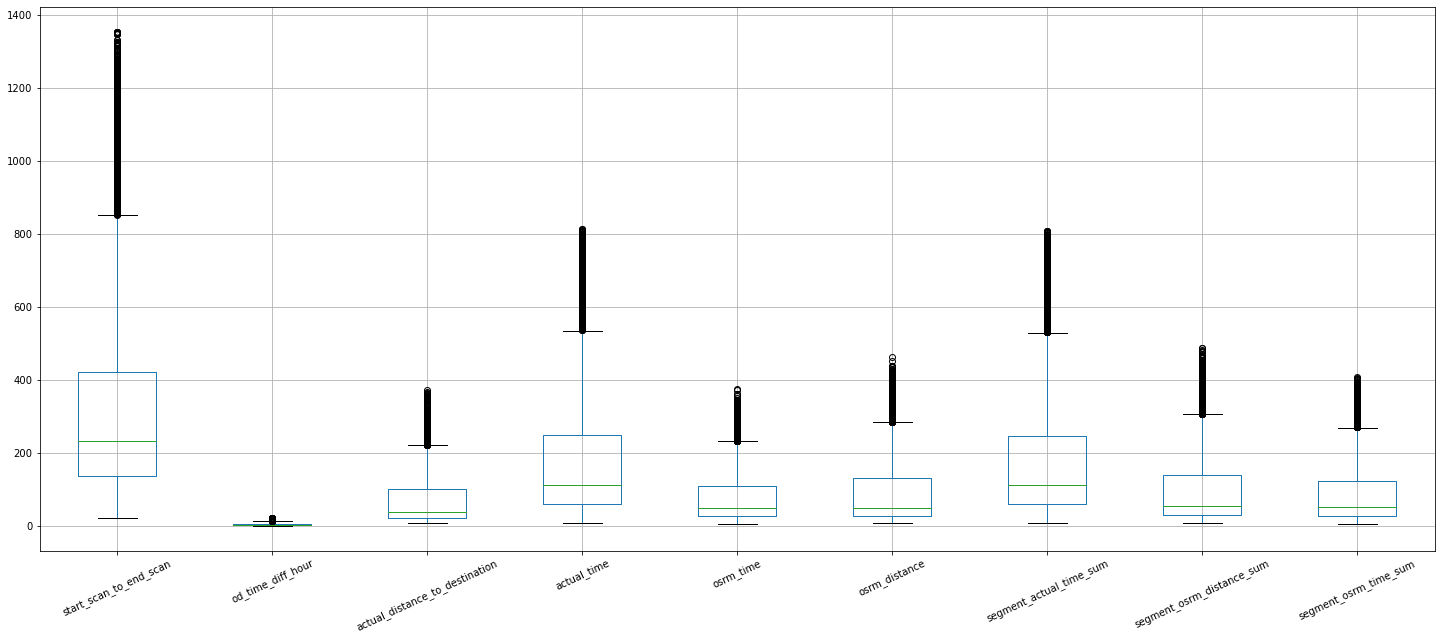

In [32]:
trip[num_cols].boxplot(rot=25,figsize=(25,10))

### 4.3 Handling categorical variables


- There is only one categorical variable i.e route_type and has two values FTL,Carting

In [33]:
trip['route_type'].value_counts()

Carting    8812
FTL        3911
Name: route_type, dtype: int64

In [34]:
#one-hot encoding
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})
route_counts = trip['route_type'].value_counts()
trip['route_type'].value_counts(normalize=True) * 100
#trip['route_type'].value_counts()

1    69.260395
0    30.739605
Name: route_type, dtype: float64

**Note:**
- **69.26% of deliveries are completed via carting, while the remaining 30.73% are handled through FTL**

In [35]:
# Group data by source and destination to get the busiest corridors
corridor_data = trip.groupby(['source_city', 'destination_city']).agg({
    'trip_uuid': 'count',
    'actual_distance_to_destination': 'mean',
    'actual_time': 'mean',
    'osrm_time' : 'mean',
    'segment_osrm_time_sum' : 'mean',
    'segment_actual_time_sum' : 'mean'
}).reset_index().rename(columns={'trip_uuid': 'trip_count'})

# Sort by the busiest corridors (most trips)
busiest_corridors = corridor_data.sort_values(by='trip_count', ascending=False).head(10)
busiest_corridors.head().reset_index(drop=True)

,source_city,destination_city,trip_count,actual_distance_to_destination,actual_time,osrm_time,segment_osrm_time_sum,segment_actual_time_sum
0,bengaluru,bengaluru,1643,29.984678,85.214851,42.202678,46.975046,84.139988
1,mumbai,mumbai,757,18.506362,73.071334,21.039630,21.421400,72.667107
2,bhiwandi,mumbai,436,22.624733,74.316514,25.043578,24.880734,73.708716
3,hyderabad,hyderabad,349,44.302587,126.446991,43.146132,50.607450,125.277937
4,mumbai,bhiwandi,270,21.562836,93.933333,24.414815,24.448148,93.355556


### **Univariate analysis**

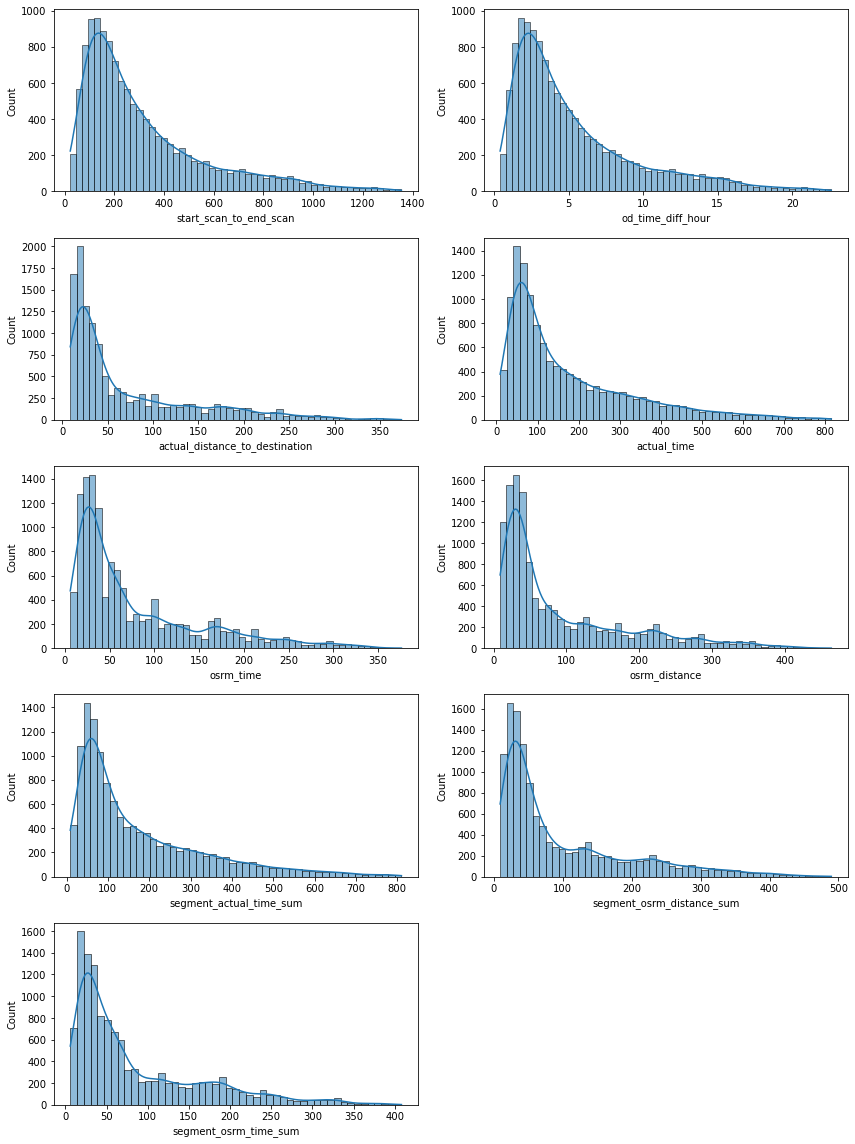

In [36]:
# Create subplots
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))

for i in range(5):  # number of rows
    for j in range(2):  # number of columns
        index = i * 2 + j
        if index < len(num_cols):
            sns.histplot(data=trip, x=num_cols[index], kde=True, ax=ax[i, j])
        else:
            # Remove empty subplots
            fig.delaxes(ax[i, j])

# Adjust layout
plt.tight_layout()
plt.show()


**Note:**
- The histogram of all numerical variables indicates that the data is right-skewed.


### Multivariate analysis

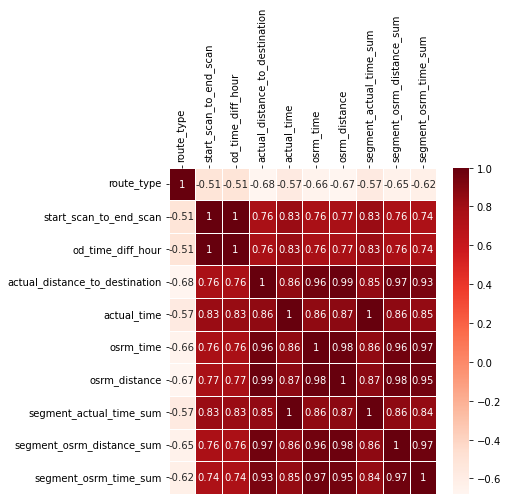

In [37]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(trip.select_dtypes(include=np.number).corr(), annot=True, linewidth=0.5, cmap = "Reds", ax=ax)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

- **It is important to note that the heatmap reveals strong positive correlations between all time and distance variables.**

### 4.4 Normalize the numerical features

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trip[num_cols])
trip[num_cols]=scaler.transform(trip[num_cols])

In [39]:
trip[num_cols].head()

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0.117868,0.118559,0.176119,0.166253,0.167568,0.167335,0.164794,0.156330,0.146766
1,0.057808,0.057749,0.022426,0.062035,0.024324,0.023343,0.062422,0.022484,0.024876
2,0.521021,0.520930,0.325009,0.411911,0.300000,0.303075,0.413233,0.286617,0.271144
3,0.124625,0.125213,0.042791,0.064516,0.045946,0.041795,0.063670,0.039525,0.042289
4,0.056306,0.055883,0.000269,0.018610,0.018919,0.006482,0.018727,0.006130,0.017413


### 5. Hypothesis Testing

#### 5.1 Hypothesis testing/ Visual analysis between start_scan_to_end_scan and od_time_diff_hour.

  **Formulating the Hypothesis**
 - Ho : start_scan_to_end_scan and od_time_diff_hour are similar
 - Ha : start_scan_to_end_scan and od_time_diff_hour are different

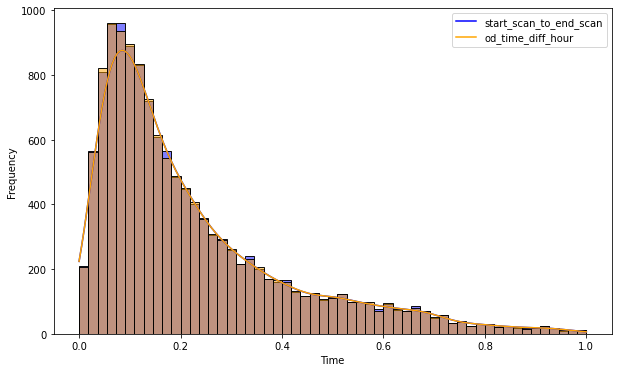

In [40]:
# Create a figure with a specific size
plt.figure(figsize=(10,6))

# Plot two histograms and KDE
sns.histplot(trip['start_scan_to_end_scan'], color='blue', kde=True)
sns.histplot(trip['od_time_diff_hour'], color='orange', kde=True)

# Add a legend for clarity
plt.legend(['start_scan_to_end_scan', 'od_time_diff_hour'])

# Label the axes
plt.xlabel('Time')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [41]:
kruskal_stat, p_val = kruskal(trip['start_scan_to_end_scan'],trip['od_time_diff_hour'])
p_val

0.9811390456582993

In [42]:
sig_level = 0.05
if p_val < sig_level:
    print('We reject null Hypothesis. start_scan_to_end_scan and od_time_diff_hour are not similar')
else:
    print('We fail to reject null Hypthesis. start_scan_to_end_scan and od_time_diff_hour are similar')

We fail to reject null Hypthesis. start_scan_to_end_scan and od_time_diff_hour are similar




#### **5.2** Hypothesis testing/ Visual analysis between **actual_time aggregated value** and **OSRM_time aggregated value.**

 **Formulating the Hypothesis**
- Ho : actual_time and osrm_time are similar 
- Ha : actual_time and osrm_time are different

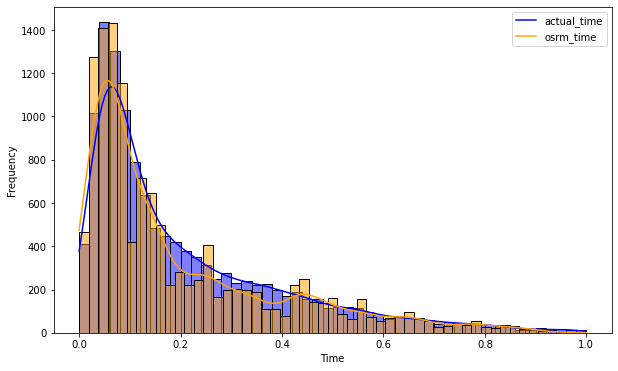

In [43]:

# Create a figure with a specific size
plt.figure(figsize=(10,6))

# Plot two histograms and KDE
sns.histplot(trip['actual_time'], color='blue', kde=True)
sns.histplot(trip['osrm_time'], color='orange', kde=True)

# Add a legend for clarity
plt.legend(['actual_time', 'osrm_time'])

# Label the axes
plt.xlabel('Time')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [44]:
kruskal_stat, p_val = kruskal(trip['actual_time'],trip['osrm_time'])
p_val

1.3094380508408646e-20

In [45]:

if p_val < sig_level:
    print('We reject null Hypothesis. Actual_time and osrm_time are not similar')
else:
    print('We fail to reject null Hypthesis. Actual_time and osrm_time are similar')

We reject null Hypothesis. Actual_time and osrm_time are not similar


#### **5.3** Hypothesis testing/ Visual analysis between **aggregated actual_time and aggregated segment_actual_time.**

 **Formulating the Hypothesis**
- Ho : actual_time and segment_actual_time_sum are similar 
- Ha : actual_time and segment_actual_time_sum are different

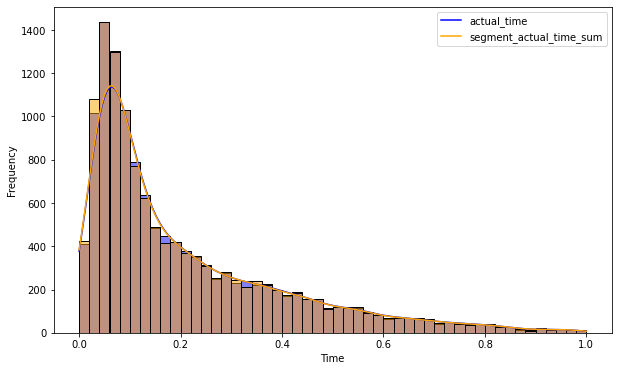

In [46]:
# Create a figure with a specific size
plt.figure(figsize=(10,6))

# Plot two histograms and KDE
sns.histplot(trip['actual_time'], color='blue', kde=True)
sns.histplot(trip['segment_actual_time_sum'], color='orange', kde=True)

# Add a legend for clarity
plt.legend(['actual_time', 'segment_actual_time_sum'])

# Label the axes
plt.xlabel('Time')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [47]:
kruskal_stat, p_val = kruskal(trip['actual_time'],trip['segment_actual_time_sum'])
p_val

0.716705110329332

In [48]:
if p_val < sig_level:
    print('We reject null Hypothesis. Actual_time and segment_actual_time_sum are not similar')
else:
    print('We fail to reject null Hypthesis. Actual_time and segment_actual_time_sum are similar')

We fail to reject null Hypthesis. Actual_time and segment_actual_time_sum are similar


####  **5.4** Hypothesis testing/ Visual analysis between **aggregated osrm_distance and aggregated segment_osrm_distance.**

 **Formulating the Hypothesis**
- Ho : osrm_distance and segment_osrm_distance_sum are similar 
- Ha : osrm_distance and segment_osrm_distance_sum are different

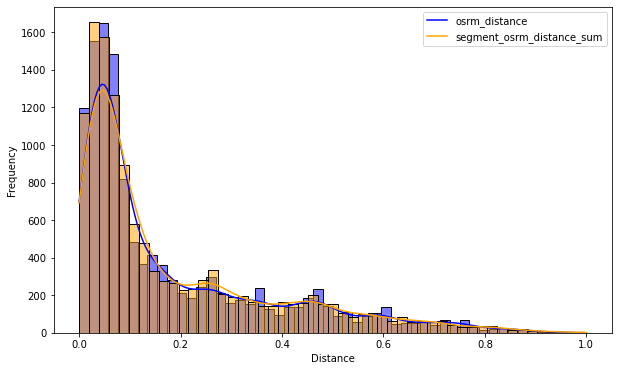

In [49]:
# Create a figure with a specific size
plt.figure(figsize=(10,6))

# Plot two histograms and KDE
sns.histplot(trip['osrm_distance'], color='blue', kde=True)
sns.histplot(trip['segment_osrm_distance_sum'], color='orange', kde=True)

# Add a legend for clarity
plt.legend(['osrm_distance', 'segment_osrm_distance_sum'])

# Label the axes
plt.xlabel('Distance')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [50]:
kruskal_stat, p_val = kruskal(trip['osrm_distance'],trip['segment_osrm_distance_sum'])
p_val

0.05751029331836961

In [51]:
if p_val < sig_level:
    print('We reject null Hypothesis. osrm_distance and segment_osrm_distance_sum are not similar')
else:
    print('We fail to reject null Hypthesis. osrm_distance and segment_osrm_distance_sum are similar')

We fail to reject null Hypthesis. osrm_distance and segment_osrm_distance_sum are similar


#### **5.5** Hypothesis testing/ Visual analysis between **aggregated osrm_time and aggregated segment_osrm_time**
  **Formulating the Hypothesis**
- Ho : osrm_time and segment_osrm_time are similar
- H1 : osrm_time and segment_osrm_time are different

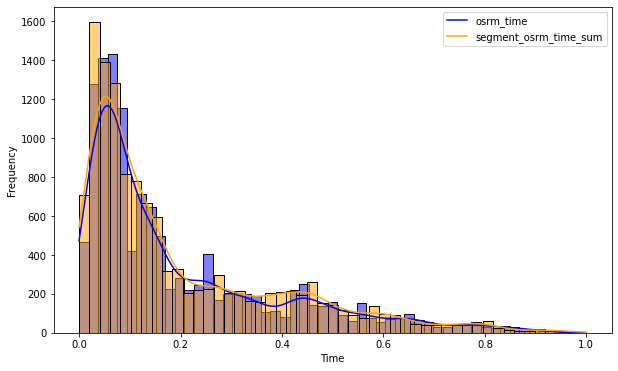

In [52]:
# Create a figure with a specific size
plt.figure(figsize=(10,6))

# Plot two histograms and KDE
sns.histplot(trip['osrm_time'], color='blue', kde=True)
sns.histplot(trip['segment_osrm_time_sum'], color='orange', kde=True)

# Add a legend for clarity
plt.legend(['osrm_time', 'segment_osrm_time_sum'])

# Label the axes
plt.xlabel('Time')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [53]:
kruskal_stat, p_val = kruskal(trip['osrm_time'],trip['segment_osrm_time_sum'])
p_val

0.8230926537150282

In [54]:
if p_val < sig_level:
    print('We reject null Hypothesis. osrm_time and segment_osrm_time_sum are not similar')
else:
    print('We fail to reject null Hypthesis. osrm_time and segment_osrm_time_sum are similar')

We fail to reject null Hypthesis. osrm_time and segment_osrm_time_sum are similar


### 6. Business Insights

####  6.1 Top 5 source states

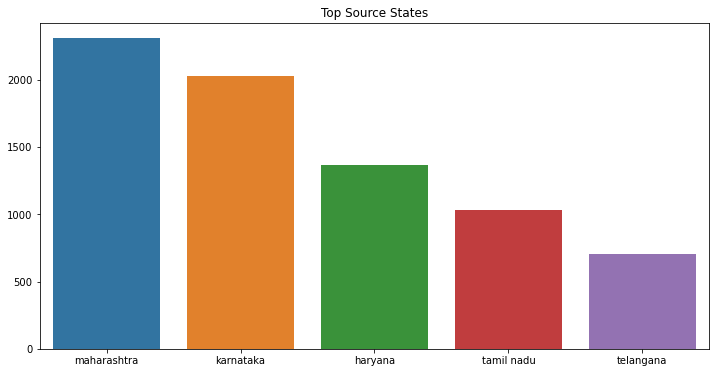

In [55]:
top_source_state=trip['source_state'].value_counts().head()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_source_state.index, y=top_source_state.values)
plt.title('Top Source States')
plt.show()

####  6.2 Top 5 destination states

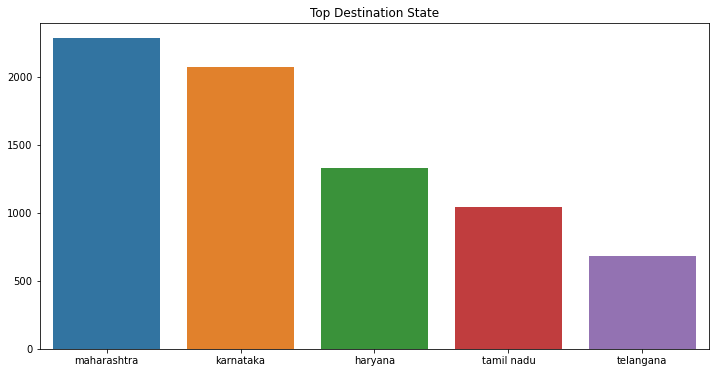

In [56]:
top_destination_state = trip['destination_state'].value_counts().head()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_destination_state.index, y=top_destination_state.values)
plt.title('Top Destination State')
plt.show()

####  6.3 Top 5 source cities

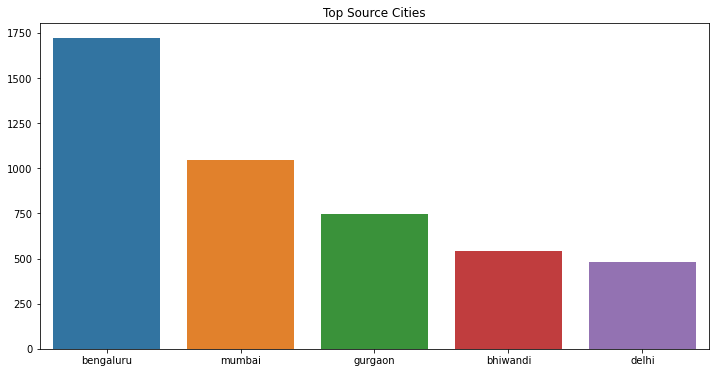

In [57]:
top_source_city=trip['source_city'].value_counts().head()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_source_city.index, y=top_source_city.values)
plt.title('Top Source Cities')
plt.show()

####  6.4 Top 5 destination cities

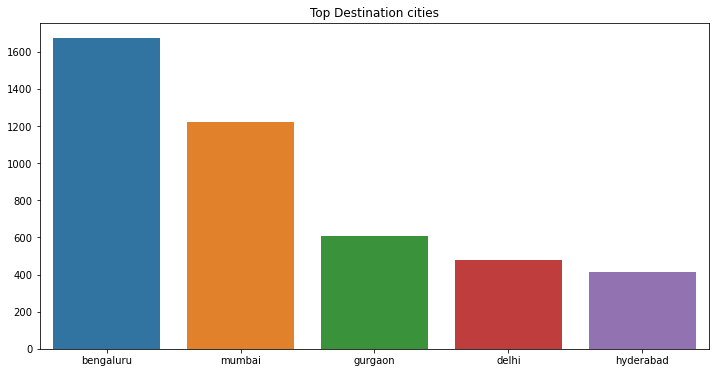

In [58]:
top_destination_city = trip['destination_city'].value_counts().head()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_destination_city.index, y=top_destination_city.values)
plt.title('Top Destination cities')
plt.show()

####  6.5 Busiest corridors by number of trips

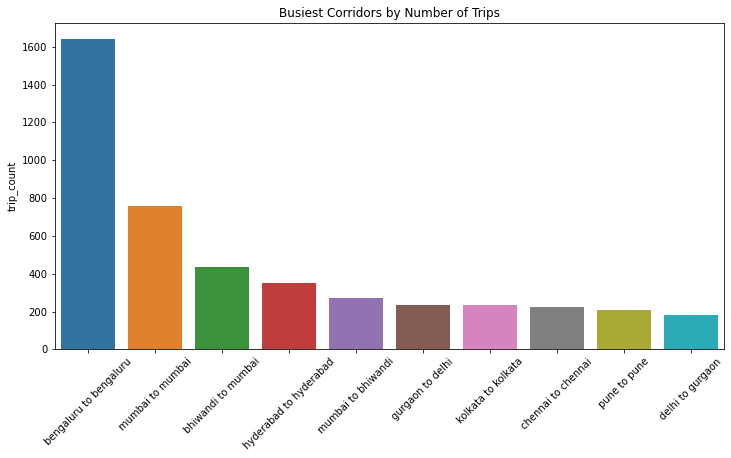

In [59]:

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=busiest_corridors['source_city'] + ' to ' + busiest_corridors['destination_city'], 
            y=busiest_corridors['trip_count'])
plt.xticks(rotation=45)
plt.title('Busiest Corridors by Number of Trips')
plt.show()


In [60]:
#Busiest corridors insights
busiest_corridors.head().reset_index(drop=True)

,source_city,destination_city,trip_count,actual_distance_to_destination,actual_time,osrm_time,segment_osrm_time_sum,segment_actual_time_sum
0,bengaluru,bengaluru,1643,29.984678,85.214851,42.202678,46.975046,84.139988
1,mumbai,mumbai,757,18.506362,73.071334,21.039630,21.421400,72.667107
2,bhiwandi,mumbai,436,22.624733,74.316514,25.043578,24.880734,73.708716
3,hyderabad,hyderabad,349,44.302587,126.446991,43.146132,50.607450,125.277937
4,mumbai,bhiwandi,270,21.562836,93.933333,24.414815,24.448148,93.355556


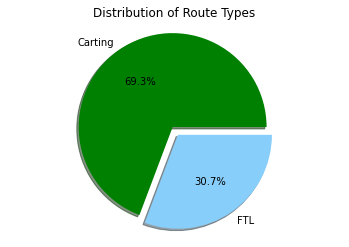

In [61]:
# Plotting the pie chart
labels = ['Carting','FTL']
sizes = route_counts
colors = ['green', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True,)
plt.title('Distribution of Route Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()


- The most common route type is **Carting.**
- The top 3 **source** and **destination states** are **Maharastra, Karnataka and Haryana.**
- The top 3 **source** and **destination cities** are **Bengaluru, Mumbai and Gurgaon.**
- Most of the packages are sent and received within Bengaluru, Mumbai and Hyderabad but the **most busiest corridor is Bhiwandi-Mumbai.**
- **start_scan_to_end_scan** and **od_time_diff_hour** are **similar**
- Aggregated **actual_time** and aggregated **osrm_time** are **not similar.**
- Aggregated **actual_time** and aggregated **segment_actual_time** are **similar.**
- Aggregated **osrm_distance** and aggregated **segment_osrm_distance** are **similar.**
- Aggregated **osrm_time** and aggregated **segment_osrm_time** are **similar.**

### **7. Business Recommendations** <br>

**Optimize resources for busiest corridors:**

- While most packages are sent and received within Bengaluru, Mumbai and Hyderabad and the busiest corridor is Bhiwandi-Mumbai. So based on this, Delhivery should allocate additional resources such as warehouse, vehicles and manpower to manage the high shipment volume in this corridor more effectively.


**Refine distance and time estimations:**

- There is a significant difference between the actual time and the OSRM time (predicted time by the routing engine) across corridors. Therefore, the company should adjust the algorithm to improve prediction accuracy.

**Promote FTL as faster than carting**
- The company should emphasize the benefits of the Full Truck Load (FTL) route type as a faster delivery option compared to carting. By highlighting its speed advantages, FTL can be recommended to large organizations as a more efficient choice